In [2]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [3]:
#Creating non-linear data (based on quadratic equation)
m = 100 #Total number of samples
X = 6 * np.random.rand(m, 1) - 3 #Creating X-values using a Uniform Distribution Noise
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1) #Creating y-values using Quadratic function (0.5X^2 + X + 2) with Normal Distribution Noise

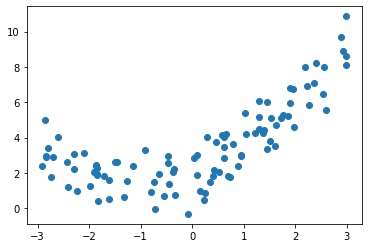

In [4]:
#Viewing the non-linear data
plt.scatter(X,y)

In [5]:
#Creating a second degree feature from the given features 
poly_features = PolynomialFeatures(degree=2, include_bias=False) #Creating a set of features with 2nd degree
X_poly = poly_features.fit_transform(X) #Transforming given features to 2D features

In [6]:
#Viewing the different values from given features and transformed features
print("Linear Feature: {}".format(X[0]))
print("Polynomial Feature: {}".format(X_poly[0]))

Linear Feature: [0.89478394]
Polynomial Feature: [0.89478394 0.8006383 ]


In [7]:
#Creating a Linear Regressor to predict these polynomial features
linear_reg = LinearRegression()
linear_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
#Viewing the results obtained from regressor
linear_reg.coef_, linear_reg.intercept_

(array([[0.98932517, 0.47784946]]), array([2.06512763]))

In [17]:
#Viewing the learning curve for the trained Regression Model
def plot_learning_curve(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) #Creating training and validation datasets
  train_errors, val_errors = [], [] 
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m]) #Training the model on the given dataset
    y_train_predict = model.predict(X_train[:m]) #Predicting values from the trained model on training dataset
    y_val_predict = model.predict(X_val) #Predicting values from the trained model on validation dataset
    train_errors.append(mean_squared_error(y_train_predict, y_train[:m])) #Checking error rate in prediction on training data
    val_errors.append(mean_squared_error(y_val_predict, y_val)) #Checking error rate in prediction on validation data
  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label="train") #Plotting the graph for training errors
  plt.plot(np.sqrt(val_errors), 'g-+', linewidth=3, label="validation") #Plotting the graph for validation errors
  plt.legend()

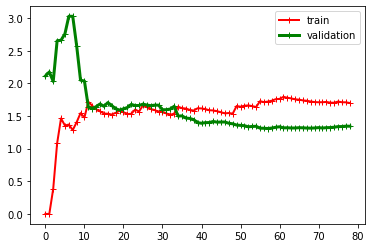

In [18]:
#Visualizing learning curve for Linear Regressor model on given data
linear_reg = LinearRegression()
plot_learning_curve(linear_reg, X, y)

The above learning curve represents the fact that the training model started with a very high error rate but with more training examples, it got stuck to a average worst case for the errors. Meanwhile, the validation data started with even more error rate as in the start validation was difficult but with the addition of more training instances, validation also improved and reached an average case line as plotted in the graph. This shows that Linear Regression Model is underfitting for this problem

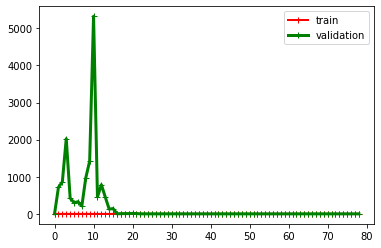

In [20]:
#Visualizing learning curve for a 10th degree polynomial model
polynomial_reg = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("linear_reg", LinearRegression())
))

plot_learning_curve(polynomial_reg, X, y)

The above learning curve indicates that the error rate for training set was None from the start i.e. with addition of more training instances, it didn't produce any error (meaning the model is 100% accurate). Moreover, the error rate in validation is very high in the start but after some time it reaches the same position as that for training one (0 error rate) indicating the validation has been performed perfectly. This shows that 10th degree Polynomial Model is highly overfitting for this data

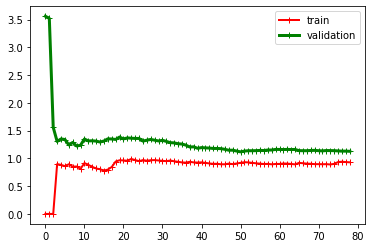

In [21]:
#Visualizing learning curve for Quadratic Model
quadratic_reg = Pipeline((
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("linear_reg", LinearRegression())
))

plot_learning_curve(quadratic_reg, X, y)